In [1]:
import pandas as pd

import pylab as pl
pl.style.use('bmh')

import seaborn as sn
from seaborn import boxplot
pl.style.use('seaborn-v0_8-darkgrid')



T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\diabete_population.csv')
P=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\diabete_patients.csv')
T.head()

,grossesses,glucose,pression,insuline,imc,K,age,M
0,2,104,75,28,39.020106,0.145273,35,1
1,10,121,64,517,30.672607,0.154211,43,1
2,2,153,59,87,26.295668,1.029407,22,1
3,9,145,47,226,46.077807,0.086713,37,1
4,3,102,76,315,28.335339,0.109751,21,1


In [2]:
# Get the parameters, excluding the "M" column
paramètres = [c for c in T.columns if c != "M"]
paramètres

['grossesses', 'glucose', 'pression', 'insuline', 'imc', 'K', 'age']

In [3]:
# Calculate the mean of each column in T, excluding the "M" column
Moy = T[paramètres].mean()
Moy

grossesses      3.820000
glucose       107.422500
pression       72.152500
insuline      155.992500
imc            31.853995
K               0.427129
age            30.780000
dtype: float64

In [4]:
# Calculate the standard deviation of each column in T, excluding the "M" column
Sig = T[paramètres].std(ddof=0)
Sig

grossesses      3.522442
glucose        31.265380
pression       16.399672
insuline      140.274187
imc             9.630331
K               0.424546
age            12.597087
dtype: float64

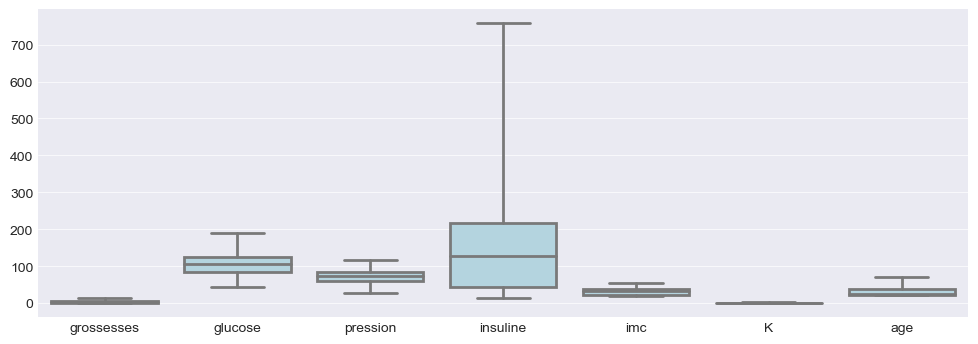

In [5]:
# Plot the box plot of each parameter
pl.figure(figsize=(12, 4))
boxplot(data = T[paramètres],
        color='lightblue',
        whis=[0,100])
pl.show()

In [18]:
# Normalize the entire DataFrame
Pn = (P[paramètres] - Moy) / Sig
Pn.head()

,grossesses,glucose,pression,insuline,imc,K,age
0,1.186677,-0.013513,-0.253206,0.128374,-0.706641,-0.711474,-0.696987
1,-1.084475,-1.132962,0.722423,0.691556,-0.231660,0.965497,1.049449
2,-0.516687,2.097448,0.051678,3.243701,-0.076218,1.584572,2.319584
3,-0.232793,-0.045498,0.112655,0.342240,-0.500231,-0.768260,-0.776370
4,1.470571,0.914030,-0.619067,-0.007075,0.652177,0.172542,-0.696987


In [19]:
Tn=(T[paramètres]-Moy)/Sig
Tn.head()

,grossesses,glucose,pression,insuline,imc,K,age
0,-0.516687,-0.109466,0.173632,-0.912445,0.744119,-0.663899,0.334998
1,1.754464,0.434266,-0.497114,2.573585,-0.122674,-0.642846,0.970066
2,-0.516687,1.457763,-0.801998,-0.491840,-0.577169,1.418643,-0.696987
3,1.470571,1.201888,-1.533720,0.499076,1.476981,-0.801835,0.493765
4,-0.232793,-0.173435,0.234608,1.133548,-0.365372,-0.747569,-0.776370


# step 3

In [20]:
Tn['M']=T['M']
Tn.head()

,grossesses,glucose,pression,insuline,imc,K,age,M
0,-0.516687,-0.109466,0.173632,-0.912445,0.744119,-0.663899,0.334998,1
1,1.754464,0.434266,-0.497114,2.573585,-0.122674,-0.642846,0.970066,1
2,-0.516687,1.457763,-0.801998,-0.491840,-0.577169,1.418643,-0.696987,1
3,1.470571,1.201888,-1.533720,0.499076,1.476981,-0.801835,0.493765,1
4,-0.232793,-0.173435,0.234608,1.133548,-0.365372,-0.747569,-0.776370,1


In [21]:
import plotly. express as px

fig = px.scatter_3d(
    data_frame = Tn,
    x='insuline',
    y='glucose',
    z= 'pression',
    opacity = 0.6,
    color = Tn['M'].astype(str),
    color_discrete_map={'1':'gray',
                       '0':'blue'}
            )

fig.update_layout(
width = 700,

    legend = {'x' : 0.9,
              'y' : 0.5, 
              'title' : '<b>Malade ?</b>',
               'bordercolor': 'gray',
              'font': {'family':'Verdana','size':14},
              'borderwidth':2,
             }
)
fig.show ()

In [22]:
fig1 = px.scatter_3d(
    data_frame = Tn,
    x = 'grossesses',
    y = 'insuline',
    z='age',
    opacity = 0.6,
    color = Tn['M']. astype (str),
    color_discrete_map={'1':'gray','0':'blue'}
            )
              
    
fig1.update_layout(
    width=700,
    legend = {'x' : 0.9,
              'y' : 0.5,
              'title' :'<b>Malade ?</b>',
              'bordercolor': 'gray', 
              'font' :{'family':'Verdana','size':14},
              'borderwidth':2,
    },
)

fig1.show ()    


# Step 4

In [23]:
Par = ['grossesses','insuline','age']    

In [24]:
L1 = Tn[Par].loc[0]
L1

grossesses   -0.516687
insuline     -0.912445
age           0.334998
Name: 0, dtype: float64

In [32]:
L2 = Pn[Par].loc[0]
L2

grossesses    1.186677
insuline      0.128374
age          -0.696987
Name: 0, dtype: float64

In [33]:
d = sum([(L1[k] - L2[k])**2 for k in range(3)])
d**0.5

2.2471634056605128

In [39]:
def distance(i, p):
    L1 = Tn[Par].loc[i]
    L2 = Pn[Par].loc[p]
    diff = (L1 - L2)**2
    return diff.sum()**0.5

In [40]:
Tn['d']=[distance(i,0) for i in range(400)]
Tn.head()

,grossesses,glucose,pression,insuline,imc,K,age,M,d
0,-0.516687,-0.109466,0.173632,-0.912445,0.744119,-0.663899,0.334998,1,2.247163
1,1.754464,0.434266,-0.497114,2.573585,-0.122674,-0.642846,0.970066,1,3.013387
2,-0.516687,1.457763,-0.801998,-0.491840,-0.577169,1.418643,-0.696987,1,1.812764
3,1.470571,1.201888,-1.533720,0.499076,1.476981,-0.801835,0.493765,1,1.279025
4,-0.232793,-0.173435,0.234608,1.133548,-0.365372,-0.747569,-0.776370,1,1.741141


In [41]:
Tn.sort_values('d').head(11)

,grossesses,glucose,pression,insuline,imc,K,age,M,d
378,1.186677,1.073951,-0.741021,0.142631,-1.326848,0.182783,-0.617603,0,0.080654
59,1.186677,-0.333356,0.356562,-0.035591,1.655487,0.264280,-0.776370,1,0.182171
162,1.186677,-0.173435,-0.375160,-0.078364,1.584368,0.729210,-0.696987,1,0.206738
181,1.186677,0.178392,-0.375160,0.413529,-1.320341,-0.669197,-0.696987,1,0.285156
249,1.470571,1.521731,-0.801998,0.206791,-0.332218,0.485075,-0.617603,0,0.305036
102,0.902783,-0.205419,0.051678,0.021440,-0.029445,0.205000,-0.776370,1,0.313580
340,0.902783,1.649668,0.539492,0.021440,-1.070732,-0.596192,-0.617603,0,0.313580
204,1.470571,-1.100978,-0.741021,0.242436,0.754114,-0.487960,-0.776370,0,0.316082
131,1.470571,0.466251,0.417539,-0.014204,0.658202,0.976806,-0.696987,1,0.317686
58,1.186677,0.754109,-0.070276,0.456303,0.362206,2.133896,-0.696987,1,0.327929


In [42]:
Tn.sort_values('d').head(11).M.sum()

7

# Prediction

In [43]:
def prediction(p):
    Tn['d'] = [distance(i, p) for i in range(400)]
    nb_malades = Tn.sort_values('d').head(11).M.sum()
    if nb_malades >= 6:
        return 1
    else:
        return 0

In [44]:
prediction(0)

1

In [50]:
Pn['M'] = P['M']
Pn.head()

,grossesses,glucose,pression,insuline,imc,K,age,M,T
0,1.186677,-0.013513,-0.253206,0.128374,-0.706641,-0.711474,-0.696987,1,1
1,-1.084475,-1.132962,0.722423,0.691556,-0.231660,0.965497,1.049449,1,1
2,-0.516687,2.097448,0.051678,3.243701,-0.076218,1.584572,2.319584,1,1
3,-0.232793,-0.045498,0.112655,0.342240,-0.500231,-0.768260,-0.776370,1,1
4,1.470571,0.914030,-0.619067,-0.007075,0.652177,0.172542,-0.696987,1,1


In [56]:
Pn['T'] = [prediction(p) for p in range(100)]
Pn.head()

,grossesses,glucose,pression,insuline,imc,K,age,M,T
0,1.186677,-0.013513,-0.253206,0.128374,-0.706641,-0.711474,-0.696987,1,1
1,-1.084475,-1.132962,0.722423,0.691556,-0.231660,0.965497,1.049449,1,1
2,-0.516687,2.097448,0.051678,3.243701,-0.076218,1.584572,2.319584,1,1
3,-0.232793,-0.045498,0.112655,0.342240,-0.500231,-0.768260,-0.776370,1,1
4,1.470571,0.914030,-0.619067,-0.007075,0.652177,0.172542,-0.696987,1,1


In [52]:
E = pd.crosstab(Pn['M'], Pn['T'], margins=True)
E

T,0,1,All
M,,,
0,44,6,50
1,9,41,50
All,53,47,100


In [53]:
(E.loc[0,0] + E.loc[1,1]) / 100

0.85

In [54]:
E.loc[0,0] / 50

0.88

In [55]:
E.loc[1,1] / 50

0.82

Text(0, 0.5, 'Predictive Value')

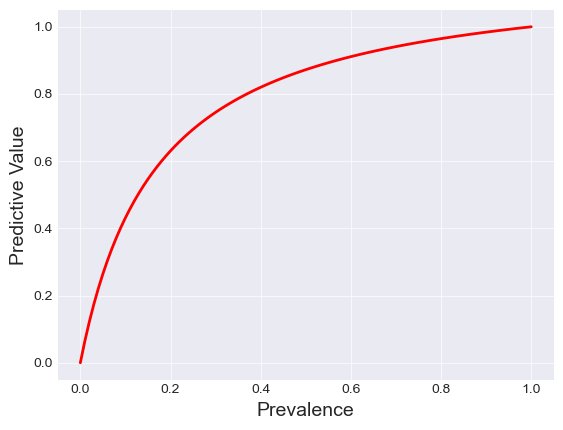

In [58]:
Pr = [k/100 for k in range(101)]
L = [0.82*p / (0.12 + 0.7*p) for p in Pr]

pl.plot(Pr, L, color='red')
pl.xlabel('Prevalence', fontsize=14)
pl.ylabel('Predictive Value', fontsize=14)